###  Let's implement modulators and demodulators for Double Sideband Amplitude Modulation (DSB-SC) and Large Carrier Double Sideband Amplitude Modulation (DSB-TC) using Python. We will also plot their frequency domain amplitude and phase spectrums.

#### First, let's import the necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.fft import fft, fftfreq

#### Now, let's create a function to generate a carrier wave and modulate it using DSB-AM and DSB-LC-AM:

In [2]:
def dsb_amplitude_modulation(carrier_freq, modulating_signal, modulation_index, large_carrier=False):
    time = np.arange(0, 1, 1/sample_rate)
    carrier_wave = np.cos(2 * np.pi * carrier_freq * time)
    if large_carrier:
        modulated_wave = (1 + modulation_index * modulating_signal) * carrier_wave
    else:
        modulated_wave = modulating_signal * carrier_wave
    return modulated_wave

#### Create a function for demodulation:

In [3]:
def demodulation(modulated_signal):
    analytic_signal = hilbert(modulated_signal)
    demodulated_signal = np.abs(analytic_signal)
    return demodulated_signal

#### Function for plotting amplitude and phase spectrums:

In [4]:
def plot_spectrum(signal, title):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sample_rate)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.stem(xf, np.abs(yf), ".")
    ax1.set_title(f'Amplitude Spectrum - {title}')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Amplitude')

    ax2.stem(xf, np.angle(yf), ".")
    ax2.set_title(f'Phase Spectrum - {title}')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Phase (radians)')

    plt.show()

#### Now, let's create the modulating signal and perform DSB-SC and DSB-TC:

In [11]:
sample_rate = 100
#modulating_freq = 50
#carrier_freq = 1000
modulation_index = 0.5
modulating_freq = 1
carrier_freq = 10

time = np.arange(0, 1, 1/sample_rate)
modulating_signal = np.cos(2 * np.pi * modulating_freq * time)

dsb_am = dsb_amplitude_modulation(carrier_freq, modulating_signal, modulation_index, large_carrier=False)
dsb_lc_am = dsb_amplitude_modulation(carrier_freq, modulating_signal, modulation_index, large_carrier=True)

### Plot the time domain signals

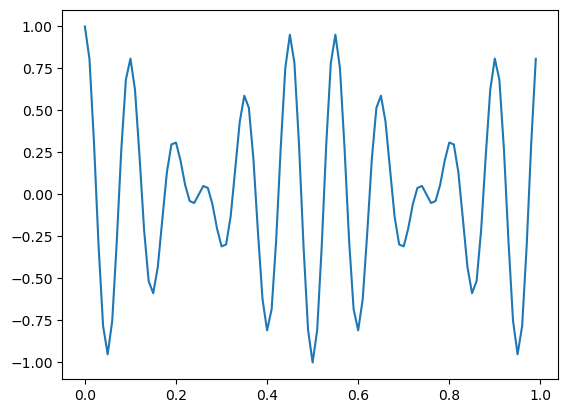

In [12]:
plt.plot(time, dsb_am)

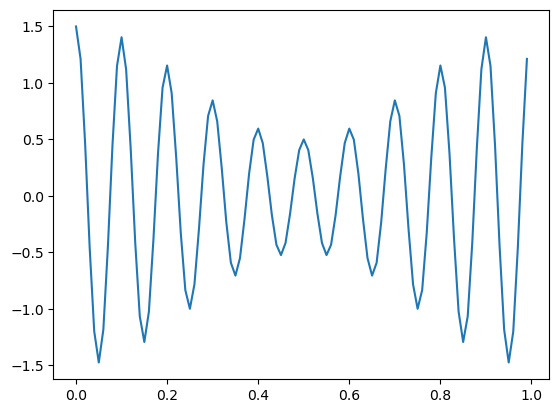

In [13]:
plt.plot(time, dsb_lc_am)

#### Now, plot the frequency domain amplitude and phase spectrums of DSB-AM and DSB-LC-AM:

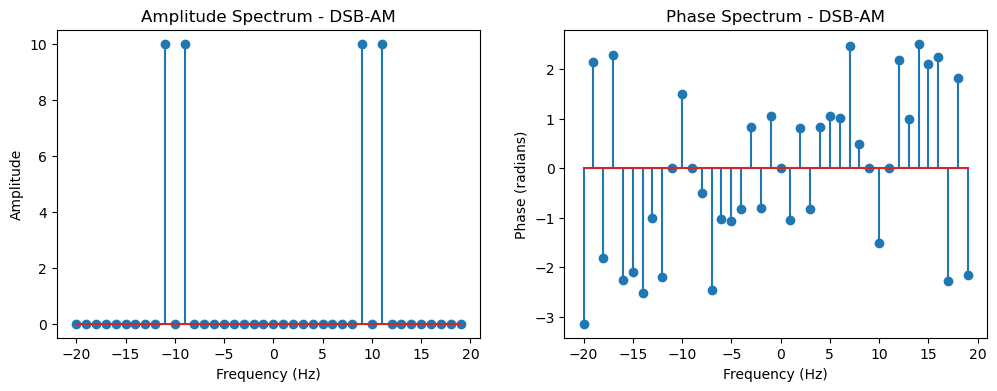

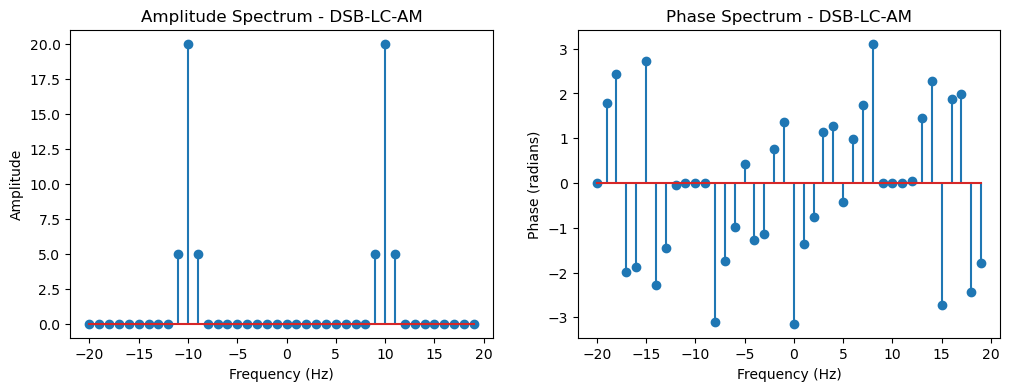

In [6]:
plot_spectrum(dsb_am, 'DSB-AM')
plot_spectrum(dsb_lc_am, 'DSB-LC-AM')

#### Finally, perform demodulation and plot the demodulated signals:

Text(0, 0.5, 'Amplitude')

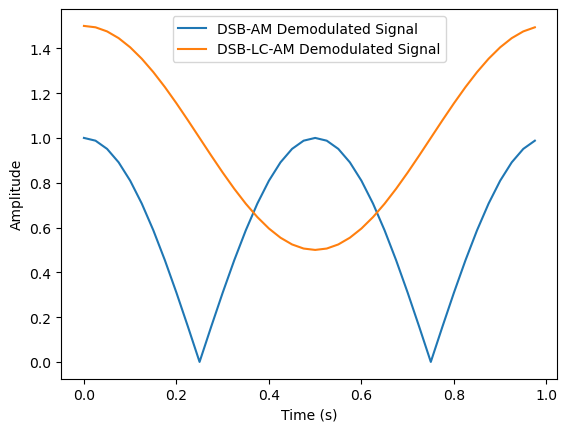

In [7]:
demodulated_dsb_am = demodulation(dsb_am)
demodulated_dsb_lc_am = demodulation(dsb_lc_am)

plt.figure()
plt.plot(time, demodulated_dsb_am, label="DSB-AM Demodulated Signal")
plt.plot(time, demodulated_dsb_lc_am, label="DSB-LC-AM Demodulated Signal")
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')